## MASTER DATA SCIENCE: NUCLIO
## PROFESOR: JOSEPH GALLART
## PROJECT RENFE: PREPARAR EL DATASET PARA LA PREDICCION DE PRECIOS DE LOS BILLETES DE RENFE

In [3]:
#importamos librería
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math


from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import LabelEncoder,MinMaxScaler, StandardScaler

import folium
import plotly.express as px
from sklearn.ensemble import RandomForestRegressor

import pickle

from sklearn import metrics


In [4]:
#leemos el fichero de renfe
df_renfe=pd.read_csv("datasets/renfe.csv",sep=";")
df_renfe.head()

,FECHA_CONSULTA,FECHA_INICIO,FECHA_FIN,CIUDAD_ORIGEN,CIUDAD_DESTINO,TIPO_TREN,TIPO_TARIFA,CLASE,PRECIO
0,2019-05-25 01:43:03,2019-06-28 20:36:00,2019-06-28 23:14:00,SEVILLA,MADRID,ALVIA,Flexible,Turista,67.20
1,2019-06-22 13:05:11,2019-07-14 10:00:00,2019-07-14 13:10:00,BARCELONA,MADRID,AVE,Flexible,Turista,107.70
2,2019-04-17 06:24:03,2019-05-23 13:40:00,2019-05-23 16:10:00,SEVILLA,MADRID,AVE,Promo,Turista,47.30
3,2019-05-10 21:21:59,2019-05-29 14:50:00,2019-05-29 22:30:00,VALENCIA,MADRID,REGIONAL,Adulto ida,Turista,28.35
4,2019-05-09 19:43:37,2019-06-26 13:25:00,2019-06-26 16:24:00,MADRID,BARCELONA,AVE-TGV,Promo,Turista,66.75


In [5]:
'''PREGUNTA 2
2. ¿Puedes decir en cuáles variables existen nulos?
'''

'PREGUNTA 2\n2. ¿Puedes decir en cuáles variables existen nulos?\n'

In [6]:
df_renfe.isnull().sum()

FECHA_CONSULTA        0
FECHA_INICIO          0
FECHA_FIN             0
CIUDAD_ORIGEN         0
CIUDAD_DESTINO        0
TIPO_TREN             0
TIPO_TARIFA        1343
CLASE              1343
PRECIO            28530
dtype: int64

In [7]:
'''PREGUNTA 3
3. Hagamos un df_renfe.info(), ¡Marca todas las INCORRECTAS!
'''

'PREGUNTA 3\n3. Hagamos un df_renfe.info(), ¡Marca todas las INCORRECTAS!\n'

In [8]:
##########EJECUTAR DESPUES DE RESPONDER LA PREGUNTA 3############
for i in ["FECHA_CONSULTA","FECHA_INICIO","FECHA_FIN"]:
    df_renfe[i]=pd.to_datetime(df_renfe[i])
#####################################

In [9]:
df_renfe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 383568 entries, 0 to 383567
Data columns (total 9 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   FECHA_CONSULTA  383568 non-null  datetime64[ns]
 1   FECHA_INICIO    383568 non-null  datetime64[ns]
 2   FECHA_FIN       383568 non-null  datetime64[ns]
 3   CIUDAD_ORIGEN   383568 non-null  object        
 4   CIUDAD_DESTINO  383568 non-null  object        
 5   TIPO_TREN       383568 non-null  object        
 6   TIPO_TARIFA     382225 non-null  object        
 7   CLASE           382225 non-null  object        
 8   PRECIO          355038 non-null  float64       
dtypes: datetime64[ns](3), float64(1), object(5)
memory usage: 26.3+ MB


In [10]:
'''PREGUNTA 4'''
##########PREGUNTA 4. INTERPRETAR EL CODIGO (1)############
df_renfe["TIEMPO_VIAJE"]=(df_renfe["FECHA_FIN"]-df_renfe["FECHA_INICIO"])/np.timedelta64(1,'m')
df_renfe["DIF_INI_BUS"]=(df_renfe["FECHA_INICIO"]-df_renfe["FECHA_CONSULTA"])/np.timedelta64(1,'m')
#####################################

In [11]:
df_renfe.head()

,FECHA_CONSULTA,FECHA_INICIO,FECHA_FIN,CIUDAD_ORIGEN,CIUDAD_DESTINO,TIPO_TREN,TIPO_TARIFA,CLASE,PRECIO,TIEMPO_VIAJE,DIF_INI_BUS
0,2019-05-25 01:43:03,2019-06-28 20:36:00,2019-06-28 23:14:00,SEVILLA,MADRID,ALVIA,Flexible,Turista,67.20,158.0,50092.950000
1,2019-06-22 13:05:11,2019-07-14 10:00:00,2019-07-14 13:10:00,BARCELONA,MADRID,AVE,Flexible,Turista,107.70,190.0,31494.816667
2,2019-04-17 06:24:03,2019-05-23 13:40:00,2019-05-23 16:10:00,SEVILLA,MADRID,AVE,Promo,Turista,47.30,150.0,52275.950000
3,2019-05-10 21:21:59,2019-05-29 14:50:00,2019-05-29 22:30:00,VALENCIA,MADRID,REGIONAL,Adulto ida,Turista,28.35,460.0,26968.016667
4,2019-05-09 19:43:37,2019-06-26 13:25:00,2019-06-26 16:24:00,MADRID,BARCELONA,AVE-TGV,Promo,Turista,66.75,179.0,68741.383333


In [12]:
'''PREGUNTA 5'''
'''Hacer un histograma de la columna "DIF_INI_BUS", ¿Qué se puede deducir?'''

'Hacer un histograma de la columna "DIF_INI_BUS", ¿Qué se puede deducir?'

In [13]:
'''REALIZAR LO COMENTADO EN LA PREGUNTA 5'''
'''HINT: SI SE QUIERE BORRAR SE PUEDE USAR EL .drop([condicion].index)'''

'HINT: SI SE QUIERE BORRAR SE PUEDE USAR EL .drop([condicion].index)'

array([[<AxesSubplot:title={'center':'DIF_INI_BUS'}>]], dtype=object)

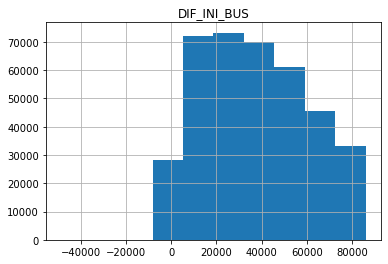

In [14]:
df_renfe.hist(column="DIF_INI_BUS")

In [15]:
df_renfe.drop(df_renfe[df_renfe["DIF_INI_BUS"]<0].index, axis=0, inplace=True)

In [16]:
df_renfe.reset_index(drop=True,inplace=True)

In [17]:
'''PREGUNTA 6
6. ¿Existen filas duplicadas?¿Cuantas filas son?
'''

'PREGUNTA 6\n6. ¿Existen filas duplicadas?¿Cuantas filas son?\n'

In [18]:
df_renfe[df_renfe.duplicated()].shape

(33, 11)

In [19]:
len(df_renfe[df_renfe.duplicated()])

33

In [20]:
df_renfe[df_renfe.duplicated()]

,FECHA_CONSULTA,FECHA_INICIO,FECHA_FIN,CIUDAD_ORIGEN,CIUDAD_DESTINO,TIPO_TREN,TIPO_TARIFA,CLASE,PRECIO,TIEMPO_VIAJE,DIF_INI_BUS
67366,2019-04-29 23:15:13,2019-05-14 06:20:00,2019-05-14 14:25:00,MADRID,BARCELONA,LD-AVE,Promo,Turista,NaN,485.0,20584.783333
72061,2019-05-13 05:35:59,2019-05-26 17:30:00,2019-05-26 19:43:00,VALENCIA,MADRID,INTERCITY,Flexible,Turista,55.40,133.0,19434.016667
82276,2019-04-30 09:09:51,2019-05-19 17:30:00,2019-05-19 19:43:00,VALENCIA,MADRID,INTERCITY,Flexible,Turista,55.40,133.0,27860.150000
88232,2019-05-15 23:37:01,2019-06-21 21:05:00,2019-06-21 23:32:00,VALENCIA,MADRID,INTERCITY,NaN,NaN,NaN,147.0,53127.983333
106107,2019-08-15 19:26:51,2019-08-23 21:03:00,2019-08-23 23:28:00,VALENCIA,MADRID,INTERCITY,Flexible,Turista,55.40,145.0,11616.150000
107255,2019-06-12 11:51:44,2019-06-16 17:30:00,2019-06-16 19:43:00,VALENCIA,MADRID,INTERCITY,Flexible,TuristaSólo plaza H,55.40,133.0,6098.266667
143126,2019-08-17 03:22:19,2019-09-01 21:03:00,2019-09-01 23:28:00,VALENCIA,MADRID,INTERCITY,Flexible,Turista,NaN,145.0,22660.683333
158865,2019-05-16 13:12:07,2019-06-29 21:05:00,2019-06-29 23:32:00,VALENCIA,MADRID,INTERCITY,NaN,NaN,NaN,147.0,63832.883333
162739,2019-06-12 05:22:45,2019-07-25 21:03:00,2019-07-25 23:28:00,VALENCIA,MADRID,INTERCITY,Promo,Turista,25.50,145.0,62860.250000
170340,2019-05-15 21:26:30,2019-06-23 21:05:00,2019-06-23 23:32:00,VALENCIA,MADRID,INTERCITY,NaN,NaN,NaN,147.0,56138.500000


In [21]:
'''SI EXISTEN DUPLICADOS BORRARLOS Y LLAMAR AL DF: df_renfe_sin_duplicados, SINO EXISTE NO CREAR UN NUEVO DATAFRAME'''


'SI EXISTEN DUPLICADOS BORRARLOS Y LLAMAR AL DF: df_renfe_sin_duplicados, SINO EXISTE NO CREAR UN NUEVO DATAFRAME'

In [22]:
df_renfe_sin_duplicados = df_renfe.drop_duplicates().copy()

In [23]:
df_renfe_sin_duplicados.reset_index(drop=True,inplace=True)

In [24]:
'''PREGUNTA 7
7. Luego de eliminar los duplicados, ¿Aún existen nulos?
'''

'PREGUNTA 7\n7. Luego de eliminar los duplicados, ¿Aún existen nulos?\n'

In [25]:
df_renfe_sin_duplicados.isnull().sum()

FECHA_CONSULTA        0
FECHA_INICIO          0
FECHA_FIN             0
CIUDAD_ORIGEN         0
CIUDAD_DESTINO        0
TIPO_TREN             0
TIPO_TARIFA        1311
CLASE              1311
PRECIO            28357
TIEMPO_VIAJE          0
DIF_INI_BUS           0
dtype: int64

In [26]:
'''PREGUNTA 8'''
##########PREGUNTA 8. INTERPRETAR EL CODIGO (2º)############
for col in ['FECHA_CONSULTA', 'FECHA_INICIO', 'FECHA_FIN']:
    df_renfe_sin_duplicados[col + '_HORA'] = df_renfe_sin_duplicados[col].dt.hour
    df_renfe_sin_duplicados[col + '_NOMBREDIA'] = df_renfe_sin_duplicados[col].dt.day_name()
    ##O .dt.weekday_name
    df_renfe_sin_duplicados[col + '_DIA'] = df_renfe_sin_duplicados[col].dt.day
    df_renfe_sin_duplicados[col + '_MES'] = df_renfe_sin_duplicados[col].dt.month
    
    del df_renfe_sin_duplicados[col]

df_renfe_sin_duplicados.head()
#####################################

,CIUDAD_ORIGEN,CIUDAD_DESTINO,TIPO_TREN,TIPO_TARIFA,CLASE,PRECIO,TIEMPO_VIAJE,DIF_INI_BUS,FECHA_CONSULTA_HORA,FECHA_CONSULTA_NOMBREDIA,FECHA_CONSULTA_DIA,FECHA_CONSULTA_MES,FECHA_INICIO_HORA,FECHA_INICIO_NOMBREDIA,FECHA_INICIO_DIA,FECHA_INICIO_MES,FECHA_FIN_HORA,FECHA_FIN_NOMBREDIA,FECHA_FIN_DIA,FECHA_FIN_MES
0,SEVILLA,MADRID,ALVIA,Flexible,Turista,67.20,158.0,50092.950000,1,Saturday,25,5,20,Friday,28,6,23,Friday,28,6
1,BARCELONA,MADRID,AVE,Flexible,Turista,107.70,190.0,31494.816667,13,Saturday,22,6,10,Sunday,14,7,13,Sunday,14,7
2,SEVILLA,MADRID,AVE,Promo,Turista,47.30,150.0,52275.950000,6,Wednesday,17,4,13,Thursday,23,5,16,Thursday,23,5
3,VALENCIA,MADRID,REGIONAL,Adulto ida,Turista,28.35,460.0,26968.016667,21,Friday,10,5,14,Wednesday,29,5,22,Wednesday,29,5
4,MADRID,BARCELONA,AVE-TGV,Promo,Turista,66.75,179.0,68741.383333,19,Thursday,9,5,13,Wednesday,26,6,16,Wednesday,26,6


In [27]:
'''PREGUNTA 9
9. En el precio existen nulos, ¿Qué porcentaje representa del total del dataset?
'''

'PREGUNTA 9\n9. En el precio existen nulos, ¿Qué porcentaje representa del total del dataset?\n'

In [28]:
(df_renfe_sin_duplicados["PRECIO"].isnull().sum()/len(df_renfe_sin_duplicados))*100

7.406546449914329

In [29]:
df_renfe_sin_duplicados.shape

(382864, 20)

In [30]:
(df_renfe_sin_duplicados["PRECIO"].isnull().sum()/(df_renfe_sin_duplicados.shape[0]))*100

7.406546449914329

In [31]:
df_renfe_sin_duplicados[df_renfe_sin_duplicados["PRECIO"]==0]

,CIUDAD_ORIGEN,CIUDAD_DESTINO,TIPO_TREN,TIPO_TARIFA,CLASE,PRECIO,TIEMPO_VIAJE,DIF_INI_BUS,FECHA_CONSULTA_HORA,FECHA_CONSULTA_NOMBREDIA,FECHA_CONSULTA_DIA,FECHA_CONSULTA_MES,FECHA_INICIO_HORA,FECHA_INICIO_NOMBREDIA,FECHA_INICIO_DIA,FECHA_INICIO_MES,FECHA_FIN_HORA,FECHA_FIN_NOMBREDIA,FECHA_FIN_DIA,FECHA_FIN_MES
121729,BARCELONA,MADRID,AVE,4x100,Turista,0.0,190.0,68338.650000,9,Monday,17,6,20,Saturday,3,8,23,Saturday,3,8
136664,BARCELONA,MADRID,AVE-TGV,Flexible,Preferente,0.0,175.0,5016.516667,1,Thursday,13,6,12,Sunday,16,6,15,Sunday,16,6


In [32]:
##########EJECUTAR DESPUES DE RESPONDER LA PREGUNTA 9############
###VAMOS A BORRAR LOS PRECIOS CON 0####
df_renfe_sin_duplicados.drop(df_renfe_sin_duplicados[df_renfe_sin_duplicados["PRECIO"]==0].index, axis=0, inplace=True)
#####################################



In [33]:
'''PREGUNTA 10
10. Qué sería lo más adecuado hacer con el precio, la clase y la tarifa de tren? 
hint: no probar df["clase"].mean...
'''

'PREGUNTA 10\n10. Qué sería lo más adecuado hacer con el precio, la clase y la tarifa de tren? \nhint: no probar df["clase"].mean...\n'

In [34]:
df_renfe_sin_duplicados.isnull().sum()

CIUDAD_ORIGEN                   0
CIUDAD_DESTINO                  0
TIPO_TREN                       0
TIPO_TARIFA                  1311
CLASE                        1311
PRECIO                      28357
TIEMPO_VIAJE                    0
DIF_INI_BUS                     0
FECHA_CONSULTA_HORA             0
FECHA_CONSULTA_NOMBREDIA        0
FECHA_CONSULTA_DIA              0
FECHA_CONSULTA_MES              0
FECHA_INICIO_HORA               0
FECHA_INICIO_NOMBREDIA          0
FECHA_INICIO_DIA                0
FECHA_INICIO_MES                0
FECHA_FIN_HORA                  0
FECHA_FIN_NOMBREDIA             0
FECHA_FIN_DIA                   0
FECHA_FIN_MES                   0
dtype: int64

In [35]:
'''EN CASO ELEGIR HACER UN TRATAMIENTO DE NULOS REALIZARLO
HINT: EN CASO DE QUERER HACER UNA MODA RECORDAR UTILIZAR UN [0] AL FINAL PARA OBTENER EL VALOR DE LA MODA
HINT2: EN CASO DE QUERE ELIMINAR NULOS DE UNA COLUMNA INVESTIGAR LA FUNCION dropna'''

'EN CASO ELEGIR HACER UN TRATAMIENTO DE NULOS REALIZARLO\nHINT: EN CASO DE QUERER HACER UNA MODA RECORDAR UTILIZAR UN [0] AL FINAL PARA OBTENER EL VALOR DE LA MODA\nHINT2: EN CASO DE QUERE ELIMINAR NULOS DE UNA COLUMNA INVESTIGAR LA FUNCION dropna'

In [36]:
df_renfe_sin_duplicados["CLASE"].mode()[0]

'Turista'

In [37]:
df_renfe_sin_duplicados["CLASE"].fillna(df_renfe_sin_duplicados["CLASE"].mode()[0],inplace=True)

In [38]:
df_renfe_sin_duplicados["TIPO_TARIFA"].fillna(df_renfe_sin_duplicados["TIPO_TARIFA"].mode()[0],inplace=True)

In [39]:
df_renfe_sin_duplicados.dropna(subset=["PRECIO"], inplace=True)

In [40]:
df_renfe_sin_duplicados.reset_index(drop=True, inplace=True)

In [41]:
df_renfe_sin_duplicados.isnull().sum()

CIUDAD_ORIGEN               0
CIUDAD_DESTINO              0
TIPO_TREN                   0
TIPO_TARIFA                 0
CLASE                       0
PRECIO                      0
TIEMPO_VIAJE                0
DIF_INI_BUS                 0
FECHA_CONSULTA_HORA         0
FECHA_CONSULTA_NOMBREDIA    0
FECHA_CONSULTA_DIA          0
FECHA_CONSULTA_MES          0
FECHA_INICIO_HORA           0
FECHA_INICIO_NOMBREDIA      0
FECHA_INICIO_DIA            0
FECHA_INICIO_MES            0
FECHA_FIN_HORA              0
FECHA_FIN_NOMBREDIA         0
FECHA_FIN_DIA               0
FECHA_FIN_MES               0
dtype: int64

In [42]:
##########EJECUTAR DESPUES DE RESPONDER LA PREGUNTA 10############
df_renfe_sin_duplicados.drop(["FECHA_CONSULTA_HORA","FECHA_CONSULTA_DIA","FECHA_CONSULTA_MES","FECHA_CONSULTA_NOMBREDIA"],axis=1, inplace=True)
df_renfe_clean= df_renfe_sin_duplicados.copy(deep=True)
latitud_longitud=pd.read_csv("ETL/LAT_LONG_CIUDADES.csv", sep=";")
latitud_longitud
#####################################

,PROVINCIA,LATITUD,LONGITUD
0,MADRID,40.416705,-3.703582
1,BARCELONA,41.382894,2.177432
2,SEVILLA,37.388630,-5.995340
3,VALENCIA,39.469901,-0.375951
4,PONFERRADA,42.545412,-6.593872


In [43]:
df_renfe_sin_duplicados.head()

,CIUDAD_ORIGEN,CIUDAD_DESTINO,TIPO_TREN,TIPO_TARIFA,CLASE,PRECIO,TIEMPO_VIAJE,DIF_INI_BUS,FECHA_INICIO_HORA,FECHA_INICIO_NOMBREDIA,FECHA_INICIO_DIA,FECHA_INICIO_MES,FECHA_FIN_HORA,FECHA_FIN_NOMBREDIA,FECHA_FIN_DIA,FECHA_FIN_MES
0,SEVILLA,MADRID,ALVIA,Flexible,Turista,67.20,158.0,50092.950000,20,Friday,28,6,23,Friday,28,6
1,BARCELONA,MADRID,AVE,Flexible,Turista,107.70,190.0,31494.816667,10,Sunday,14,7,13,Sunday,14,7
2,SEVILLA,MADRID,AVE,Promo,Turista,47.30,150.0,52275.950000,13,Thursday,23,5,16,Thursday,23,5
3,VALENCIA,MADRID,REGIONAL,Adulto ida,Turista,28.35,460.0,26968.016667,14,Wednesday,29,5,22,Wednesday,29,5
4,MADRID,BARCELONA,AVE-TGV,Promo,Turista,66.75,179.0,68741.383333,13,Wednesday,26,6,16,Wednesday,26,6


In [44]:
'''PREGUNTA 11'''
##########PREGUNTA 11. INTERPRETAR EL CODIGO (3)############
df_renfe_clean_1=pd.merge(df_renfe_clean,latitud_longitud, how='left',left_on=["CIUDAD_ORIGEN"],right_on=["PROVINCIA"])
df_renfe_clean_1


df_renfe_clean_1.info()
df_renfe_clean_2=pd.merge(df_renfe_clean_1,latitud_longitud, how='left', \
        suffixes=('_ORIGEN', '_DESTINO'), left_on=["CIUDAD_DESTINO"],right_on=["PROVINCIA"])


df_renfe_clean_2
df_renfe_clean_2.drop(["PROVINCIA_DESTINO","PROVINCIA_ORIGEN"],axis=1,inplace=True)

df_renfe_clean_2.shape

#####################################

<class 'pandas.core.frame.DataFrame'>
Int64Index: 354505 entries, 0 to 354504
Data columns (total 19 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   CIUDAD_ORIGEN           354505 non-null  object 
 1   CIUDAD_DESTINO          354505 non-null  object 
 2   TIPO_TREN               354505 non-null  object 
 3   TIPO_TARIFA             354505 non-null  object 
 4   CLASE                   354505 non-null  object 
 5   PRECIO                  354505 non-null  float64
 6   TIEMPO_VIAJE            354505 non-null  float64
 7   DIF_INI_BUS             354505 non-null  float64
 8   FECHA_INICIO_HORA       354505 non-null  int64  
 9   FECHA_INICIO_NOMBREDIA  354505 non-null  object 
 10  FECHA_INICIO_DIA        354505 non-null  int64  
 11  FECHA_INICIO_MES        354505 non-null  int64  
 12  FECHA_FIN_HORA          354505 non-null  int64  
 13  FECHA_FIN_NOMBREDIA     354505 non-null  object 
 14  FECHA_FIN_DIA       

(354505, 20)

In [45]:
df_renfe_clean_2.head()

,CIUDAD_ORIGEN,CIUDAD_DESTINO,TIPO_TREN,TIPO_TARIFA,CLASE,PRECIO,TIEMPO_VIAJE,DIF_INI_BUS,FECHA_INICIO_HORA,FECHA_INICIO_NOMBREDIA,FECHA_INICIO_DIA,FECHA_INICIO_MES,FECHA_FIN_HORA,FECHA_FIN_NOMBREDIA,FECHA_FIN_DIA,FECHA_FIN_MES,LATITUD_ORIGEN,LONGITUD_ORIGEN,LATITUD_DESTINO,LONGITUD_DESTINO
0,SEVILLA,MADRID,ALVIA,Flexible,Turista,67.20,158.0,50092.950000,20,Friday,28,6,23,Friday,28,6,37.388630,-5.995340,40.416705,-3.703582
1,BARCELONA,MADRID,AVE,Flexible,Turista,107.70,190.0,31494.816667,10,Sunday,14,7,13,Sunday,14,7,41.382894,2.177432,40.416705,-3.703582
2,SEVILLA,MADRID,AVE,Promo,Turista,47.30,150.0,52275.950000,13,Thursday,23,5,16,Thursday,23,5,37.388630,-5.995340,40.416705,-3.703582
3,VALENCIA,MADRID,REGIONAL,Adulto ida,Turista,28.35,460.0,26968.016667,14,Wednesday,29,5,22,Wednesday,29,5,39.469901,-0.375951,40.416705,-3.703582
4,MADRID,BARCELONA,AVE-TGV,Promo,Turista,66.75,179.0,68741.383333,13,Wednesday,26,6,16,Wednesday,26,6,40.416705,-3.703582,41.382894,2.177432


In [46]:
##########EJECUTAR DESPUES DE RESPONDER LA PREGUNTA 11############
## Gráfico evolutivo del precio por clase
df_renfe_clean_2.info()
grafico_horizontal= df_renfe_clean_2.groupby(["CLASE","FECHA_INICIO_MES"])["PRECIO"].mean().reset_index()
grafico_horizontal

evolucion_horizontal= px.bar(grafico_horizontal, x="FECHA_INICIO_MES", y="PRECIO", \
                        color="CLASE", orientation="v", color_discrete_sequence=px.colors.cyclical.mygbm)

evolucion_horizontal.show()

##################################

<class 'pandas.core.frame.DataFrame'>
Int64Index: 354505 entries, 0 to 354504
Data columns (total 20 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   CIUDAD_ORIGEN           354505 non-null  object 
 1   CIUDAD_DESTINO          354505 non-null  object 
 2   TIPO_TREN               354505 non-null  object 
 3   TIPO_TARIFA             354505 non-null  object 
 4   CLASE                   354505 non-null  object 
 5   PRECIO                  354505 non-null  float64
 6   TIEMPO_VIAJE            354505 non-null  float64
 7   DIF_INI_BUS             354505 non-null  float64
 8   FECHA_INICIO_HORA       354505 non-null  int64  
 9   FECHA_INICIO_NOMBREDIA  354505 non-null  object 
 10  FECHA_INICIO_DIA        354505 non-null  int64  
 11  FECHA_INICIO_MES        354505 non-null  int64  
 12  FECHA_FIN_HORA          354505 non-null  int64  
 13  FECHA_FIN_NOMBREDIA     354505 non-null  object 
 14  FECHA_FIN_DIA       

In [47]:
'''PREGUNTA 12
12. Elaborar un gráfico evolutivo mensual por tipo de tren, 
mencionar en JULIO(7) el precio mensual del AVE-TGV
'''

'PREGUNTA 12\n12. Elaborar un gráfico evolutivo mensual por tipo de tren, \nmencionar en JULIO(7) el precio mensual del AVE-TGV\n'

In [48]:
gf2=grafico_horizontal[grafico_horizontal["FECHA_INICIO_MES"]==7]

In [49]:
df_renfe_clean_2.info()
grafico_horizontal= df_renfe_clean_2.groupby(["TIPO_TREN","FECHA_INICIO_MES"])["PRECIO"].mean().reset_index()
grafico_horizontal

evolucion_horizontal= px.bar(grafico_horizontal, x="FECHA_INICIO_MES", y="PRECIO", \
                        color="TIPO_TREN", orientation="v", color_discrete_sequence=px.colors.cyclical.mygbm)

evolucion_horizontal.show()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 354505 entries, 0 to 354504
Data columns (total 20 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   CIUDAD_ORIGEN           354505 non-null  object 
 1   CIUDAD_DESTINO          354505 non-null  object 
 2   TIPO_TREN               354505 non-null  object 
 3   TIPO_TARIFA             354505 non-null  object 
 4   CLASE                   354505 non-null  object 
 5   PRECIO                  354505 non-null  float64
 6   TIEMPO_VIAJE            354505 non-null  float64
 7   DIF_INI_BUS             354505 non-null  float64
 8   FECHA_INICIO_HORA       354505 non-null  int64  
 9   FECHA_INICIO_NOMBREDIA  354505 non-null  object 
 10  FECHA_INICIO_DIA        354505 non-null  int64  
 11  FECHA_INICIO_MES        354505 non-null  int64  
 12  FECHA_FIN_HORA          354505 non-null  int64  
 13  FECHA_FIN_NOMBREDIA     354505 non-null  object 
 14  FECHA_FIN_DIA       

In [50]:
##########EJECUTAR DESPUES DE RESPONDER LA PREGUNTA 12############
df_renfe_clean_2.info()
mapa_datos = df_renfe_clean_2.groupby(['CIUDAD_ORIGEN', 'LATITUD_ORIGEN','LONGITUD_ORIGEN'])["PRECIO"].mean().reset_index()

mapa_global2 = folium.Map(location=[40.416705, -3.703582], tiles='cartodbpositron',
               min_zoom=4, max_zoom=8, zoom_start=6)

for i in range(0, len(mapa_datos)):
    folium.Circle(
        location=[mapa_datos.iloc[i]['LATITUD_ORIGEN'], mapa_datos.iloc[i]['LONGITUD_ORIGEN']],
        color='crimson', 
        tooltip ='<li><bold>Ciudad : '+str(mapa_datos.iloc[i]['CIUDAD_ORIGEN'])+
                 '<li><bold>Precio medio : '+str(mapa_datos.iloc[i]['PRECIO']),
        radius=int(mapa_datos.iloc[i]['PRECIO'])**2.5).add_to(mapa_global2)

mapa_global2

##################################

<class 'pandas.core.frame.DataFrame'>
Int64Index: 354505 entries, 0 to 354504
Data columns (total 20 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   CIUDAD_ORIGEN           354505 non-null  object 
 1   CIUDAD_DESTINO          354505 non-null  object 
 2   TIPO_TREN               354505 non-null  object 
 3   TIPO_TARIFA             354505 non-null  object 
 4   CLASE                   354505 non-null  object 
 5   PRECIO                  354505 non-null  float64
 6   TIEMPO_VIAJE            354505 non-null  float64
 7   DIF_INI_BUS             354505 non-null  float64
 8   FECHA_INICIO_HORA       354505 non-null  int64  
 9   FECHA_INICIO_NOMBREDIA  354505 non-null  object 
 10  FECHA_INICIO_DIA        354505 non-null  int64  
 11  FECHA_INICIO_MES        354505 non-null  int64  
 12  FECHA_FIN_HORA          354505 non-null  int64  
 13  FECHA_FIN_NOMBREDIA     354505 non-null  object 
 14  FECHA_FIN_DIA       

In [51]:
'''PREGUNTA 13
13. Mapa donde muestre las ciudades destino y su tiempo medio de viaje, 
¿Qué ciudad tiene el mayor tiempo medio?
'''

'PREGUNTA 13\n13. Mapa donde muestre las ciudades destino y su tiempo medio de viaje, \n¿Qué ciudad tiene el mayor tiempo medio?\n'

In [52]:
df_renfe_clean_2.info()
mapa_datos = df_renfe_clean_2.groupby(['CIUDAD_DESTINO', 'LATITUD_DESTINO','LONGITUD_DESTINO'])["TIEMPO_VIAJE"].mean().reset_index()

mapa_global2 = folium.Map(location=[40.416705, -3.703582], tiles='cartodbpositron',
               min_zoom=4, max_zoom=8, zoom_start=6)

for i in range(0, len(mapa_datos)):
    folium.Circle(
        location=[mapa_datos.iloc[i]['LATITUD_DESTINO'], mapa_datos.iloc[i]['LONGITUD_DESTINO']],
        color='crimson', 
        tooltip ='<li><bold>Ciudad : '+str(mapa_datos.iloc[i]['CIUDAD_DESTINO'])+
                 '<li><bold>Tiempo viaje : '+str(mapa_datos.iloc[i]['TIEMPO_VIAJE']),
        radius=int(mapa_datos.iloc[i]['TIEMPO_VIAJE'])**2).add_to(mapa_global2)

mapa_global2

<class 'pandas.core.frame.DataFrame'>
Int64Index: 354505 entries, 0 to 354504
Data columns (total 20 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   CIUDAD_ORIGEN           354505 non-null  object 
 1   CIUDAD_DESTINO          354505 non-null  object 
 2   TIPO_TREN               354505 non-null  object 
 3   TIPO_TARIFA             354505 non-null  object 
 4   CLASE                   354505 non-null  object 
 5   PRECIO                  354505 non-null  float64
 6   TIEMPO_VIAJE            354505 non-null  float64
 7   DIF_INI_BUS             354505 non-null  float64
 8   FECHA_INICIO_HORA       354505 non-null  int64  
 9   FECHA_INICIO_NOMBREDIA  354505 non-null  object 
 10  FECHA_INICIO_DIA        354505 non-null  int64  
 11  FECHA_INICIO_MES        354505 non-null  int64  
 12  FECHA_FIN_HORA          354505 non-null  int64  
 13  FECHA_FIN_NOMBREDIA     354505 non-null  object 
 14  FECHA_FIN_DIA       

In [53]:
##########EJECUTAR DESPUES DE RESPONDER LA PREGUNTA 13############
df_renfe_prep= df_renfe_clean_2.copy(deep=True)
df_renfe_prep.drop(["LATITUD_DESTINO","LONGITUD_DESTINO","LATITUD_ORIGEN","LONGITUD_ORIGEN"],axis=1, inplace=True)
##################################

In [54]:
'''PREGUNTA 14
14. Mapa de correlación: ¿Existe alguna variable muy correlacionada?
'''

'PREGUNTA 14\n14. Mapa de correlación: ¿Existe alguna variable muy correlacionada?\n'

In [55]:
corr = df_renfe_prep.corr()

In [56]:
corr.style.background_gradient(cmap="coolwarm")

,PRECIO,TIEMPO_VIAJE,DIF_INI_BUS,FECHA_INICIO_HORA,FECHA_INICIO_DIA,FECHA_INICIO_MES,FECHA_FIN_HORA,FECHA_FIN_DIA,FECHA_FIN_MES
PRECIO,1.000000,-0.236016,-0.241403,0.050322,0.032571,-0.187192,-0.011565,0.032091,-0.187222
TIEMPO_VIAJE,-0.236016,1.000000,0.018014,-0.182723,-0.006737,-0.000012,0.097962,-0.006541,0.000185
DIF_INI_BUS,-0.241403,0.018014,1.000000,0.003963,-0.029987,0.450893,0.008700,-0.030371,0.450979
FECHA_INICIO_HORA,0.050322,-0.182723,0.003963,1.000000,0.002841,-0.003478,0.715822,0.002805,-0.002653
FECHA_INICIO_DIA,0.032571,-0.006737,-0.029987,0.002841,1.000000,-0.293927,0.001468,0.996105,-0.293129
FECHA_INICIO_MES,-0.187192,-0.000012,0.450893,-0.003478,-0.293927,1.000000,-0.004544,-0.293022,0.999825
FECHA_FIN_HORA,-0.011565,0.097962,0.008700,0.715822,0.001468,-0.004544,1.000000,0.001556,-0.005986
FECHA_FIN_DIA,0.032091,-0.006541,-0.030371,0.002805,0.996105,-0.293022,0.001556,1.000000,-0.293849
FECHA_FIN_MES,-0.187222,0.000185,0.450979,-0.002653,-0.293129,0.999825,-0.005986,-0.293849,1.000000


In [57]:
#Si hay alguna correlación...borrarlo!

In [58]:
del(df_renfe_prep["FECHA_FIN_DIA"])

In [59]:
del(df_renfe_prep["FECHA_FIN_MES"])

In [60]:
'''PREGUNTA 15
15. ¿Se puede hacer algo con la distribución del precio?
'''

'PREGUNTA 15\n15. ¿Se puede hacer algo con la distribución del precio?\n'

array([[<AxesSubplot:title={'center':'PRECIO'}>]], dtype=object)

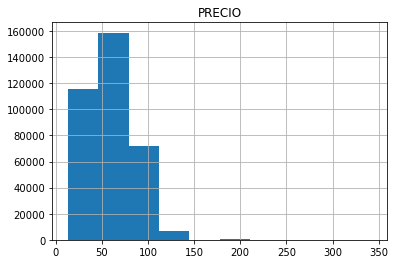

In [61]:
df_renfe_prep.hist(column="PRECIO")

array([[<AxesSubplot:title={'center':'LOG_PRECIO'}>]], dtype=object)

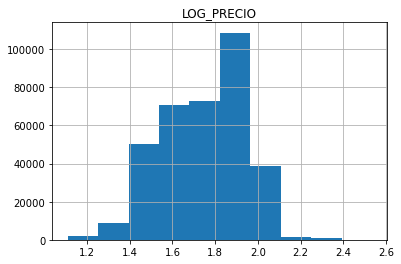

In [62]:
##########EJECUTAR DESPUES DE RESPONDER LA PREGUNTA 15############
df_renfe_prep["LOG_PRECIO"]=np.log10(df_renfe_prep["PRECIO"])
df_renfe_prep.hist(column="LOG_PRECIO")


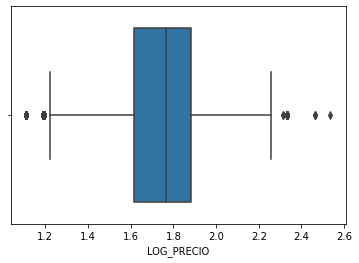

In [63]:
##########EJECUTAR DESPUES DE RESPONDER LA PREGUNTA 15############
outliers_precio2 = sns.boxplot(x=df_renfe_prep["LOG_PRECIO"])

In [64]:
#A continuación vamos a analizar la variable que queremos predecir PRECIO como se comporta frente a las demás variables#

In [65]:
muestra=pd.DataFrame(df_renfe_prep.sample(frac=0.01, random_state=1))
muestra.shape

(3545, 15)

In [66]:
##########EJECUTAR DESPUES DE RESPONDER LA PREGUNTA 15############
#Relación CIUDAD_ORIGEN vs PRECIO
muestra=pd.DataFrame(df_renfe_prep.sample(frac=0.01, random_state=1))
muestra.shape


(3545, 15)

In [67]:
'''PREGUNTA 16
16. Relación del Día de inicio de viaje y el precio, 
¿Hay algún día que muestre mayor tendencia a un precio más barato?
'''

'PREGUNTA 16\n16. Relación del Día de inicio de viaje y el precio, \n¿Hay algún día que muestre mayor tendencia a un precio más barato?\n'

<AxesSubplot:xlabel='FECHA_INICIO_NOMBREDIA', ylabel='PRECIO'>

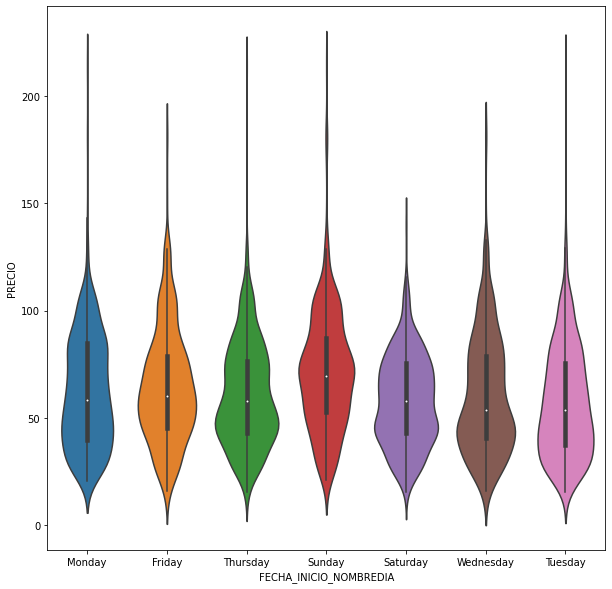

In [68]:
##########EJECUTAR DESPUES DE RESPONDER LA PREGUNTA 16############
##Scatterplot de precio vs fecha inicio
plt.figure(figsize=(10,10))
sns.violinplot(x="FECHA_INICIO_NOMBREDIA", y="PRECIO",data=muestra)
####################################

In [69]:
'''PREGUNTA 17
17. Relación del tiempo de duración del viaje y el precio ¿Ves alguna relación?
'''

'PREGUNTA 17\n17. Relación del tiempo de duración del viaje y el precio ¿Ves alguna relación?\n'

<AxesSubplot:xlabel='FECHA_INICIO_DIA', ylabel='PRECIO'>

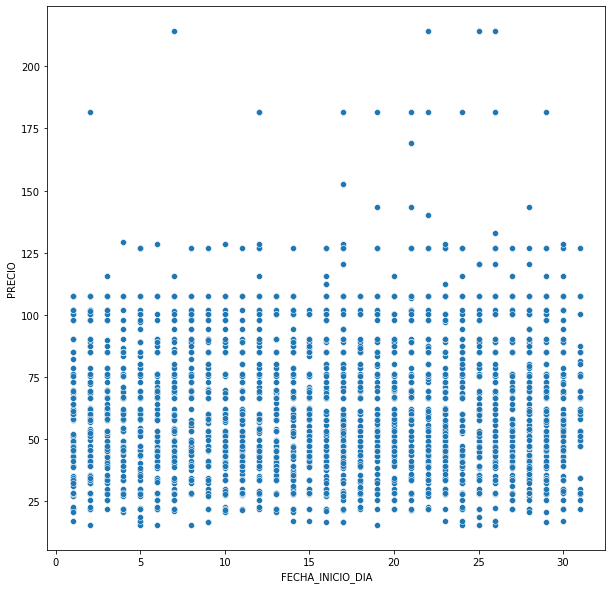

In [70]:
plt.figure(figsize=(10,10))
sns.scatterplot(x="FECHA_INICIO_DIA", y="PRECIO",data=muestra)

<AxesSubplot:xlabel='TIEMPO_VIAJE', ylabel='PRECIO'>

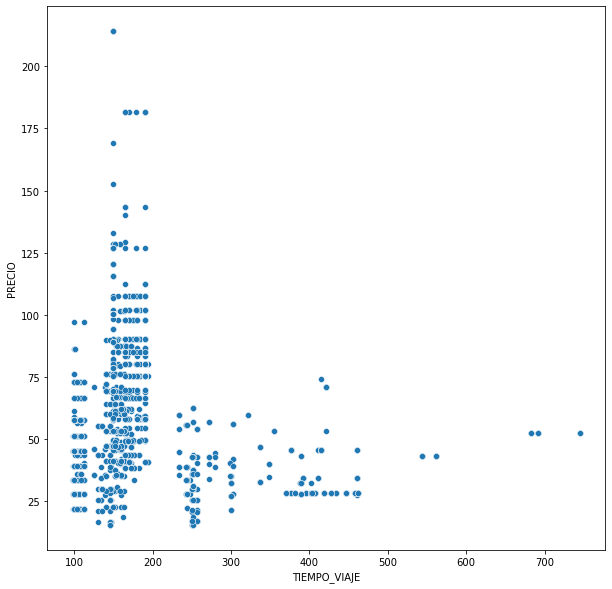

In [71]:
plt.figure(figsize=(10,10))
sns.scatterplot(x="TIEMPO_VIAJE", y="PRECIO",data=muestra)

In [72]:
##########EJECUTAR DESPUES DE RESPONDER LA PREGUNTA 17############
df_renfe_prep.head()
df_renfe_prep2=df_renfe_prep.copy(deep=True)

target=["PRECIO","LOG_PRECIO"]

def obtener_lista_variables(dataset):
    lista_numericas=[]
    lista_boolean=[]
    lista_categoricas=[]

    for i in dataset:
        if    (dataset[i].dtype=="float64" or dataset[i].dtype=="int64") and len(dataset[i].unique())!= 2  and i not in target:
              lista_numericas.append(i)
        elif  (dataset[i].dtype=="float64" or dataset[i].dtype=="int64" or dataset[i].dtype=="int8") and len(dataset[i].unique())== 2  and i not in target:
              lista_boolean.append(i)
        elif  (dataset[i].dtype=="object")  and i not in target:
              lista_categoricas.append(i)
                
    return lista_numericas, lista_boolean, lista_categoricas

lista_numericas,lista_boolean,lista_categoricas=obtener_lista_variables(df_renfe_prep2)

lista_categoricas
####################################

['CIUDAD_ORIGEN',
 'CIUDAD_DESTINO',
 'TIPO_TREN',
 'TIPO_TARIFA',
 'CLASE',
 'FECHA_INICIO_NOMBREDIA',
 'FECHA_FIN_NOMBREDIA']

In [73]:
'''PREGUNTA 18
18. Para las variables categóricas vamos a realizar el OneHotEncoding, ¿Qué significa esto?
'''

'PREGUNTA 18\n18. Para las variables categóricas vamos a realizar el OneHotEncoding, ¿Qué significa esto?\n'

In [74]:
##########EJECUTAR DESPUES DE RESPONDER LA PREGUNTA 18############
df_renfe_prep3=pd.get_dummies(data=df_renfe_prep2,
                               prefix=None, 
                               prefix_sep="_",
                               columns=lista_categoricas,
                               drop_first="True",
                               dtype="int8")


df_renfe_prep3.head()

corr = df_renfe_prep3.corr()


df_renfe_prep3.drop(["FECHA_FIN_NOMBREDIA_Monday","FECHA_FIN_NOMBREDIA_Saturday",
                "FECHA_FIN_NOMBREDIA_Sunday","FECHA_FIN_NOMBREDIA_Wednesday",
                "FECHA_FIN_NOMBREDIA_Tuesday","FECHA_FIN_NOMBREDIA_Thursday"],axis=1, inplace=True)


In [ ]:
df_renfe_prep3.head()

In [75]:
##########EJECUTAR DESPUES DE RESPONDER LA PREGUNTA 18############
#Tuneando más las variables

lista_numericas,lista_boolean,lista_categoricas=obtener_lista_variables(df_renfe_prep3)

def minmaxTransformacion(variable_transformar):
    minMaxResultado=MinMaxScaler()
    df_renfe_prep3[variable_transformar]=minMaxResultado.fit_transform(df_renfe_prep3[variable_transformar].values.reshape(-1,1))
    return minMaxResultado



In [76]:
corr = df_renfe_prep3.corr()

In [77]:
corr.style.background_gradient(cmap="coolwarm")

In [78]:

minMax_tiempo_viaje=minmaxTransformacion("TIEMPO_VIAJE")
minMax_dif_ini_bus=minmaxTransformacion("DIF_INI_BUS")
minMax_inicio_hora=minmaxTransformacion("FECHA_INICIO_HORA")
minMax_inicio_dia=minmaxTransformacion("FECHA_INICIO_DIA")
minMax_inicio_mes=minmaxTransformacion("FECHA_INICIO_MES")
minMax_fin_hora=minmaxTransformacion("FECHA_FIN_HORA")


In [79]:
df_renfe_final=df_renfe_prep3.copy(deep=True)

In [80]:
df_renfe_final.head()

,PRECIO,TIEMPO_VIAJE,DIF_INI_BUS,FECHA_INICIO_HORA,FECHA_INICIO_DIA,FECHA_INICIO_MES,FECHA_FIN_HORA,LOG_PRECIO,CIUDAD_ORIGEN_MADRID,CIUDAD_ORIGEN_PONFERRADA,...,CLASE_Turista Plus,CLASE_Turista PlusSólo plaza H,CLASE_Turista con enlace,CLASE_TuristaSólo plaza H,FECHA_INICIO_NOMBREDIA_Monday,FECHA_INICIO_NOMBREDIA_Saturday,FECHA_INICIO_NOMBREDIA_Sunday,FECHA_INICIO_NOMBREDIA_Thursday,FECHA_INICIO_NOMBREDIA_Tuesday,FECHA_INICIO_NOMBREDIA_Wednesday
0,67.20,0.092736,0.581605,0.90,0.900000,0.333333,1.000000,1.827369,0,0,...,0,0,0,0,0,0,0,0,0,0
1,107.70,0.142195,0.365538,0.40,0.433333,0.500000,0.565217,2.032216,0,0,...,0,0,0,0,0,0,1,0,0,0
2,47.30,0.080371,0.606966,0.55,0.733333,0.166667,0.695652,1.674861,0,0,...,0,0,0,0,0,0,0,1,0,0
3,28.35,0.559505,0.312947,0.60,0.933333,0.166667,0.956522,1.452553,0,0,...,0,0,0,0,0,0,0,0,0,1
4,66.75,0.125193,0.798256,0.55,0.833333,0.333333,0.695652,1.824451,1,0,...,0,0,0,0,0,0,0,0,0,1


In [81]:
#guardamos el dataset antes de hacer el preprocesamiento de datos
outfile = open('datasets/dataset_renfe_preprocessing','wb')
pickle.dump(df_renfe_prep,outfile)
outfile.close()

#guardamos el dataset final que usaremos para crear la predicción
outfile = open('datasets/dataset_renfe_final','wb')
pickle.dump(df_renfe_final,outfile)
outfile.close()

outfile = open('transformaciones/minMax_tiempo_viaje','wb')
pickle.dump(minMax_tiempo_viaje,outfile)
outfile.close()

outfile = open('transformaciones/minMax_dif_ini_bus','wb')
pickle.dump(minMax_dif_ini_bus,outfile)
outfile.close()

outfile = open('transformaciones/minMax_inicio_hora','wb')
pickle.dump(minMax_inicio_hora,outfile)
outfile.close()

outfile = open('transformaciones/minMax_inicio_dia','wb')
pickle.dump(minMax_inicio_dia,outfile)
outfile.close()

outfile = open('transformaciones/minMax_inicio_mes','wb')
pickle.dump(minMax_inicio_mes,outfile)
outfile.close()

outfile = open('transformaciones/minMax_fin_hora','wb')
pickle.dump(minMax_fin_hora,outfile)
outfile.close()